# Rotation and Transformation Matrices

This notebook covers the fundamentals of rotation matrices ($R \in SO(3)$) and transformation matrices ($T \in SE(3)$), following the framework from *Modern Robotics* (Lynch & Park, 2019).

**What you will learn:**
1. The three uses of rotation matrices: representing orientation, changing reference frames, and rotating vectors/frames.
2. The three uses of transformation matrices: representing configuration, changing reference frames, and displacing vectors/frames.
3. The critical distinction between **pre-multiplication** (transform w.r.t. the fixed frame) and **post-multiplication** (transform w.r.t. the body frame), demonstrated with 3D visualizations.

**Prerequisites:** Basic linear algebra (matrix multiplication, identity matrix, coordinate systems).

## Rotation Matrices

A rotation matrix can be used for three purposes (Lynch & Park, 2019, p. 69):

- To represent an orientation
- To change the reference frame in which a vector or a frame is represented (as an operator)
- To rotate a vector or a frame (as an operator)
---

#### Represent an orientation

Implicit representation of frame C relative to the fixed frame S:

$$R_{C}$$

Explicit representation of frame C relative to the fixed frame S:

$$R_{SC}$$

---

#### Change the reference frame

$$R_{AC} = R_{AB}R_{BC}$$

where:
 - $R_{BC}$ can be viewed as the representation of the orientation of frame C
 - $R_{AB}$ can be viewed as an operator

A subscript cancellation rule is being applied.

---

#### Rotation of a vector or frame

- Fixed-frame rotation: Premultiplying by R = Rot(ŵ; θ) yields a rotation about an axis ŵ considered to be in the fixed frame S:

$$R_{SB'} = RR_{SB}$$

- Body-frame rotation: Postmultiplying by R yields a rotation about ŵ considered as being in the body frame:

$$R_{SB''} = R_{SB}R$$



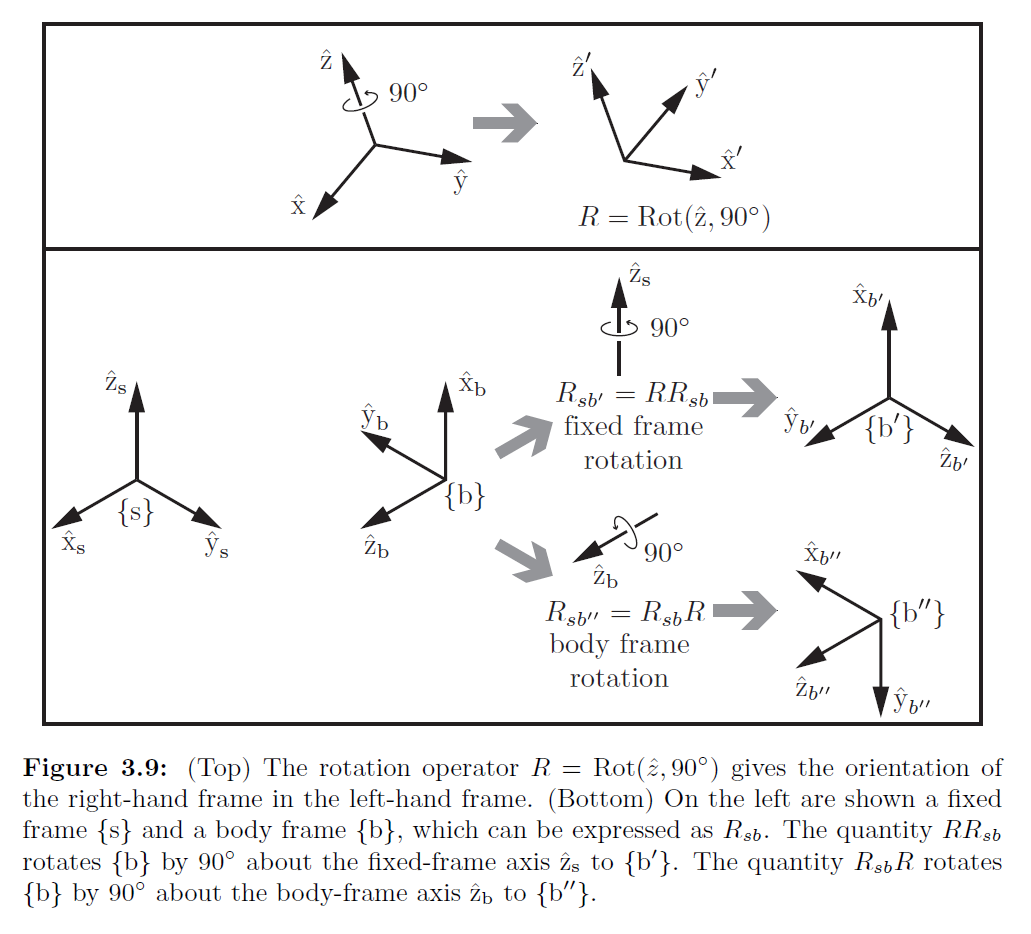

## Transformation Matrices

A transformation matrix can be used for three purposes (Lynch & Park, 2019, p. 89):

- to represent the configuration (position and orientation) of a rigid body
- to change the reference frame in which a vector or frame is represented (as an operator)
- to displace a vector or frame (as an operator)
---

## To change the reference frame in which a vector or frame is represented (as an operator)

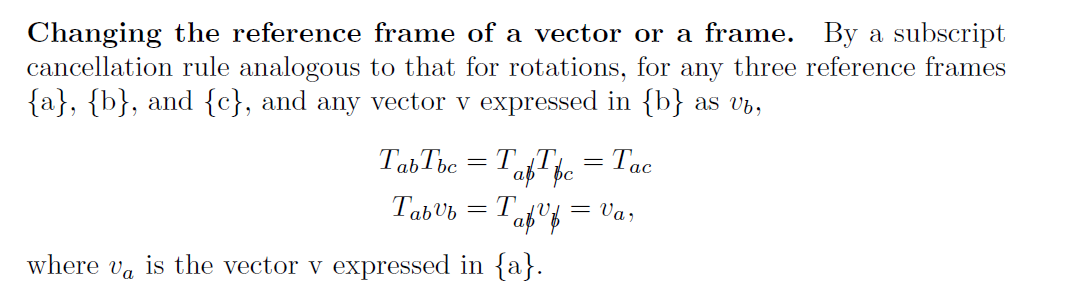

check C:\Users\Manuel\Desktop\Documentos\JOB\JOB HUNT\PORTFOLIO\src\content\blog\post3\post3.md


### To displace a vector or frame (as an operator): Pre and post-multiplication 

Pre-multiplying applies the transformation relative to the frame of the first subscript, with the result still expressed in the first frame.

Example: New C' frame, expressed in S:

$$T_{SC'} = T T_{SC}$$


Post-multiplying applies the transformation relative to the frame of the second subscript, with the result still expressed in the first frame. 

Example: New C'' frame, expressed in S:

$$ T_{SC''} = T_{SC} T $$

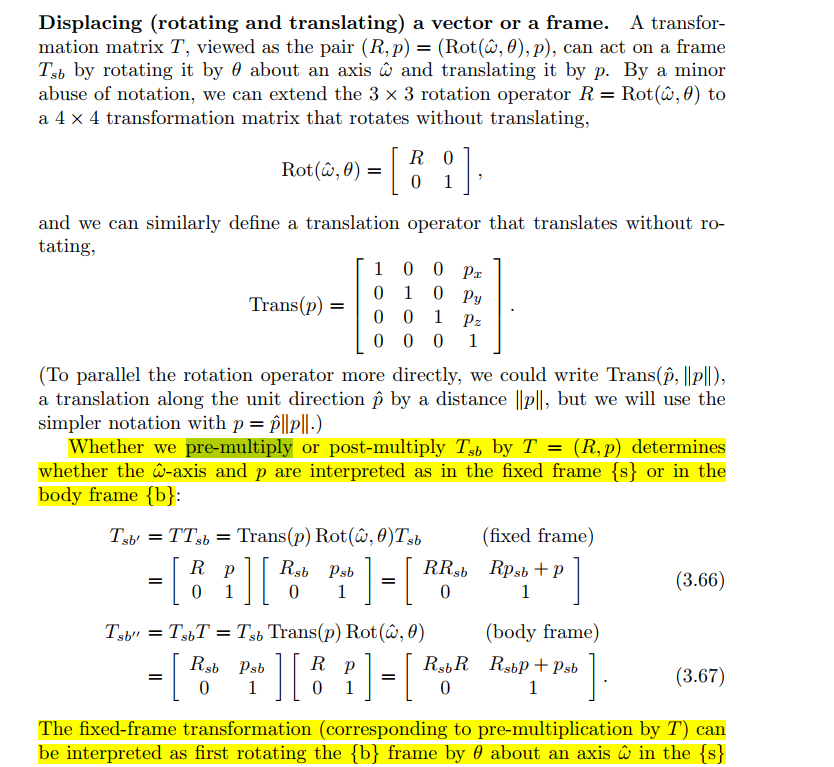

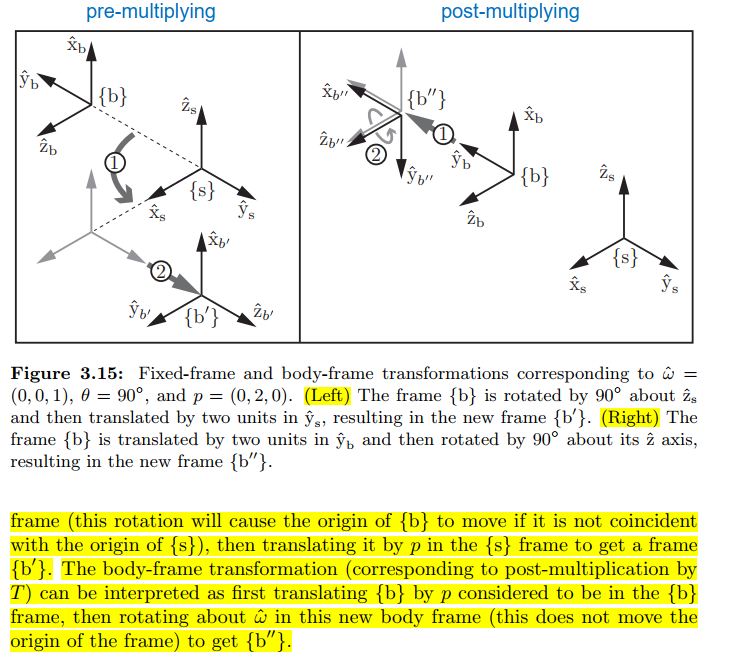

In [2]:
# External imports
import numpy as np
from machinevisiontoolbox.Camera import CentralCamera
from spatialmath import SE3, SO3  # Requires Numpy 1.x

In the following code, the poses of multiple cameras are being plotted an transformed:

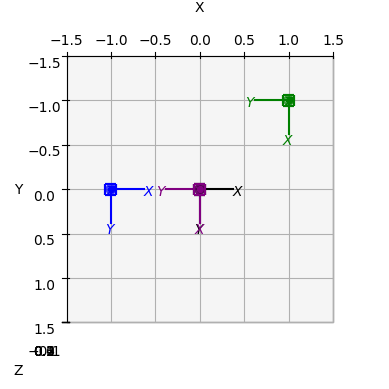

In [ ]:
# Static frame (black)
T0 = SE3.Rt(np.eye(3), np.array([0, 0, 0]))
camera = CentralCamera(pose=T0)
camera.plot(scale=0.25, color="black", frame=True)


# Blue frame
T_S_B = SE3.Rt(np.eye(3), np.array([-1, 0, 0]))
camera = CentralCamera(pose=T_S_B)
camera.plot(scale=0.25, color="blue", frame=True)

########################################################################################################################

# Transformation:
#   - Rotation of 90 deg around Z axis
#   - Translation of 1 meter in x direction
R = SO3.Rz(90, unit="deg")
t = np.array([1, 0, 0])
T = SE3.Rt(R, t)


# Pre-multiplication, causes the following, in this order:
#   - Rotation around the Z axis of the "Static" frame
#   - Translation in the X axis of the "Static" frame
# Transforms the pose of the blue frame into the pose of the green frame.
camera = CentralCamera(pose=T @ T_S_B)
camera.plot(scale=0.25, color="green", frame=True)


# Post-multiplication, causes the following, in this order:
#   - Translation in the X axis of the "Blue" frame
#   - Rotation around the Z axis of the "Blue" frame
camera = CentralCamera(pose=T_S_B @ T)
ax = camera.plot(scale=0.25, color="purple", frame=True)


ax.view_init(elev=-90.0, azim=0, roll=-90)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect("equal")